In [1]:
! rm visualising_the_results/*

# Visualising the results

In this tutorial, we demonstrate the plotting tools built-in to `bilby` and how to extend them. First, we run a simple injection study and return the `result` object.

In [2]:
import bilby
import matplotlib.pyplot as plt
%matplotlib inline

time_duration = 4.                     # time duration (seconds)
sampling_frequency = 2048.             # sampling frequency (Hz)
outdir = 'visualising_the_results'     # directory in which to store output
label = 'example'                      # identifier to apply to output files

# specify injection parameters
injection_parameters = dict(
mass_1=36.,                          # detector frame (redshifted) primary mass (solar masses)
mass_2=29.,                          # detector frame (redshifted) secondary mass (solar masses)
a_1=0.4,                             # primary dimensionless spin magnitude
a_2=0.3,                             # secondary dimensionless spin magnitude
tilt_1=0.5,                          # polar angle between primary spin and the orbital angular momentum (radians)
tilt_2=1.0,                          # polar angle between secondary spin and the orbital angular momentum 
phi_12=1.7,                          # azimuthal angle between primary and secondary spin (radians)
phi_jl=0.3,                          # azimuthal angle between total angular momentum and orbital angular momentum (radians)
luminosity_distance=200.,            # luminosity distance to source (Mpc)
theta_jn=0.4,                        # inclination angle between line of sight and orbital angular momentum (radians)
phase=1.3,                           # phase (radians)
ra=1.375,                            # source right ascension (radians)
dec=-1.2108,                         # source declination (radians)
geocent_time=1126259642.413,         # reference time at geocentre (time of coalescence or peak amplitude) (GPS seconds)
psi=2.659                            # gravitational wave polarisation angle
)

# specify waveform arguments
waveform_arguments = dict(
waveform_approximant='IMRPhenomPv2', # waveform approximant name
reference_frequency=50.,             # gravitational waveform reference frequency (Hz)
)

# set up the waveform generator
waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(
    sampling_frequency=sampling_frequency, duration=time_duration,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    parameters=injection_parameters, waveform_arguments=waveform_arguments)
# create the frequency domain signal
hf_signal = waveform_generator.frequency_domain_strain()

# initialise an interferometer based on LIGO Hanford, complete with simulated noise and injected signal
IFOs = [bilby.gw.detector.get_interferometer_with_fake_noise_and_injection(
    'H1', injection_polarizations=hf_signal, injection_parameters=injection_parameters, duration=time_duration,
    sampling_frequency=sampling_frequency, outdir=outdir)]

# first, set up all priors to be equal to a delta function at their designated value
priors = bilby.gw.prior.BBHPriorDict(injection_parameters.copy())
# then, reset the priors on the masses and luminosity distance to conduct a search over these parameters
priors['mass_1'] = bilby.core.prior.Uniform(20, 50, 'mass_1')
priors['mass_2'] = bilby.core.prior.Uniform(20, 50, 'mass_2')
priors['luminosity_distance'] = bilby.core.prior.Uniform(100, 300, 'luminosity_distance')

# compute the likelihoods
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(interferometers=IFOs, waveform_generator=waveform_generator)

result = bilby.core.sampler.run_sampler(likelihood=likelihood, priors=priors, sampler='dynesty', npoints=100,
                                   injection_parameters=injection_parameters, outdir=outdir, label=label,
                                   walks=5)

# display the corner plot
plt.show()

14:19 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
14:19 bilby INFO    : No power spectral density provided, using aLIGO,zero detuning, high power.
14:19 bilby INFO    : Injected signal in H1:
14:19 bilby INFO    :   optimal SNR = 120.28
14:19 bilby INFO    :   matched filter SNR = 121.25-0.92j
14:19 bilby INFO    :   mass_1 = 36.0
14:19 bilby INFO    :   mass_2 = 29.0
14:19 bilby INFO    :   a_1 = 0.4
14:19 bilby INFO    :   a_2 = 0.3
14:19 bilby INFO    :   tilt_1 = 0.5
14:19 bilby INFO    :   tilt_2 = 1.0
14:19 bilby INFO    :   phi_12 = 1.7
14:19 bilby INFO    :   phi_jl = 0.3
14:19 bilby INFO    :   luminosity_distance = 200.0
14:19 bilby INFO    :   theta_jn = 0.4
14:19 bilby INFO    :   phase = 1.3
14:19 bilby INFO    :   ra = 1.375
14:19 bilby INFO    :   dec = -1.2108
14:19 bilby INF

1it [00:00, ?it/s]

14:30 bilby INFO    : Written checkpoint file visualising_the_results/example_resume.pickle
/home/useradd/anaconda3/envs/py39/lib/python3.9/site-packages/dynesty/plotting.py:786: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([0., max(y0) * 1.05])
/home/useradd/anaconda3/envs/py39/lib/python3.9/site-packages/dynesty/plotting.py:786: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([0., max(y0) * 1.05])
/home/useradd/anaconda3/envs/py39/lib/python3.9/site-packages/dynesty/plotting.py:252: RuntimeWarning: overflow encountered in exp
  np.exp(logwt), logz if logplot else np.exp(logz)
/home/useradd/anaconda3/envs/py39/lib/python3.9/site-packages/dynesty/plotting.py:282: RuntimeWarning: overflow encountered in exp
  zspan = (0., 1.05 * np.exp(logz[-1] + 3. * logzerr[-1]))
14:30 bilby WARNING : Axis limits cannot b

In running this code, we already made the first plot! In the function `bilby.detector.get_interferometer_with_fake_noise_and_injection`, the ASD, detector data, and signal are plotted together. This figure is saved under `visualsing_the_results/H1_frequency_domain_data.png`. Note that `visualising_the_result` is our `outdir` where all the output of the run is stored. Let's take a quick look at that directory now:

In [3]:
!ls visualising_the_results/

H1_asd.dat		      example_checkpoint_trace_unit.png
H1_frequency_domain_data.dat  example_dynesty.pickle
H1_frequency_domain_data.png  example_result.json
example_checkpoint_stats.png  example_resume.pickle
example_checkpoint_trace.png


## Corner plots

Now lets make some corner plots. You can easily generate a corner plot using `result.plot_corner()` like this:

In [4]:
result.plot_corner()
plt.show()

In a notebook, this figure will display. But by default the file is also saved to `visualising_the_result/example_corner.png`. If you change the label to something more descriptive then the `example` here will of course be replaced.

You may also want to plot a subset of the parameters, or perhaps add the `injection_paramters` as lines to check if you recovered them correctly. All this can be done through `plot_corner`. Under the hood, `plot_corner` uses
[chain consumer](https://samreay.github.io/ChainConsumer/index.html), and all the keyword arguments passed to `plot_corner` are passed through to [the `plot` function of chain consumer](https://samreay.github.io/ChainConsumer/chain_api.html#chainconsumer.plotter.Plotter.plot).

### Adding injection parameters to the plot

In the previous plot, you'll notice `bilby` added the injection parameters to the plot by default. You can switch this off by setting `truth=None` when you call `plot_corner`. Or to add different injection parameters to the plot, just pass this as a keyword argument for `truth`. In this example, we just add a line for the luminosity distance by passing a dictionary of the value we want to display.

In [5]:
result.plot_corner(truth=dict(luminosity_distance=201))
plt.show()

### Plot a subset of the corner plot

Or, to plot just a subset of parameters, just pass a list of the names you want.

In [6]:
result.plot_corner(parameters=['mass_1', 'mass_2'], filename='{}/subset.png'.format(outdir))
plt.show()

Notice here, we also passed in a keyword argument `filename=`, this overwrites the default filename and instead saves the file as `visualising_the_results/subset.png`. Useful if you want to create lots of different plots. Let's check what the outdir looks like now

In [7]:
!ls visualising_the_results/

H1_asd.dat			   example_corner.png
H1_frequency_domain_data.dat	   example_dynesty.pickle
H1_frequency_domain_data.png	   example_result.json
example_checkpoint_stats.png	   example_resume.pickle
example_checkpoint_trace.png	   subset.png
example_checkpoint_trace_unit.png


## Alternative

If you would prefer to do the plotting yourself, you can get hold of the samples and the ordering as follows and then plot with a different module. Here is an example using the [`corner`](http://corner.readthedocs.io/en/latest/) package

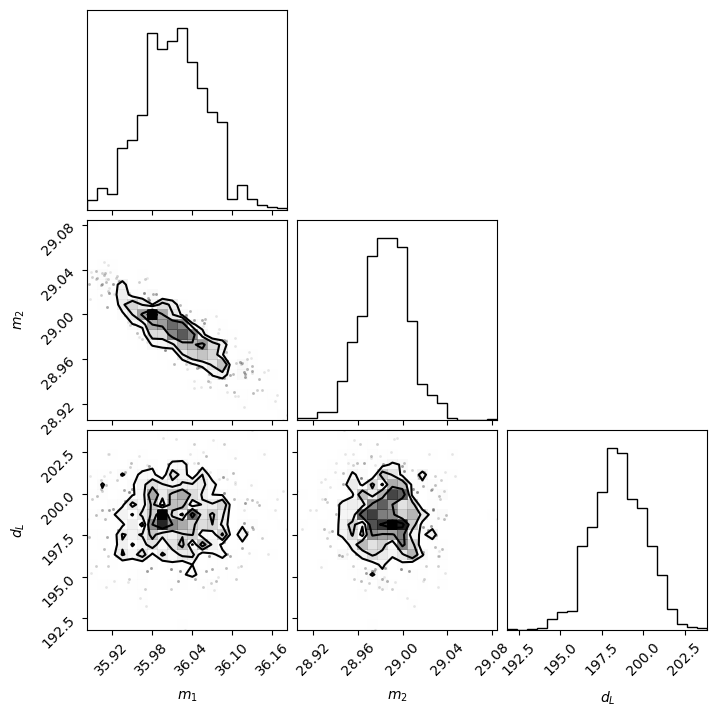

In [8]:
import corner
samples = result.samples
labels = result.parameter_labels
fig = corner.corner(samples, labels=labels)
plt.show()

## Other plots

We also include some other types of plots which may be useful. Again, these are built on chain consumer so you may find it useful to check the [documentation](https://samreay.github.io/ChainConsumer/chain_api.html#plotter-class) to see how these plots can be extended. Below, we show just one example of these.

#### Distribution plots

These plots just show the 1D histograms for each parameter

In [9]:
result.plot_marginals()
plt.show()

16:32 bilby INFO    : Plotting mass_1 marginal distribution
16:32 bilby INFO    : Plotting mass_1 marginal distribution
16:32 bilby INFO    : Plotting mass_2 marginal distribution
16:32 bilby INFO    : Plotting mass_2 marginal distribution
16:32 bilby INFO    : Plotting luminosity_distance marginal distribution
16:32 bilby INFO    : Plotting luminosity_distance marginal distribution
16:32 bilby INFO    : Plotting a_1 marginal distribution
16:32 bilby INFO    : Plotting a_1 marginal distribution
16:32 bilby INFO    : Plotting a_2 marginal distribution
16:32 bilby INFO    : Plotting a_2 marginal distribution
16:32 bilby INFO    : Plotting tilt_1 marginal distribution
16:32 bilby INFO    : Plotting tilt_1 marginal distribution
16:32 bilby INFO    : Plotting tilt_2 marginal distribution
16:32 bilby INFO    : Plotting tilt_2 marginal distribution
16:32 bilby INFO    : Plotting phi_12 marginal distribution
16:32 bilby INFO    : Plotting phi_12 marginal distribution
16:32 bilby INFO    : Plot

#### Best-Fit Time Domain Waveform plot
Some plots specific to compact binary coalescence parameter estimation results can
be created by re-loading the result as a `CBCResult`:

In [10]:
from bilby.gw.result import CBCResult

cbc_result = CBCResult.from_json("visualising_the_results/example_result.json")
cbc_result.plot_waveform_posterior()
plt.show()

16:32 bilby INFO    : Generating waveform figure for H1
16:32 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


Again, notice that the plot is saved as a "waveform.png" in the output dir.



